In [1]:
import sys

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sys.path.append('../src')
from data_utils import UnlearningDataLoader

/home/cspartalis/anaconda3/envs/MaUn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_samples_per_class(dataloader: object):
    """
    Plot the number of samples per class in the dataset.
    """
    class_dist_per_split = {}
    # Get the number of samples per class
    class_dist_per_split["train"] = dataloader.get_samples_per_class('train')
    class_dist_per_split["test"] = dataloader.get_samples_per_class('test')
    class_dist_per_split["val"] = dataloader.get_samples_per_class('val')
    class_dist_per_split["retain"] = dataloader.get_samples_per_class('retain')
    class_dist_per_split["forget"] = dataloader.get_samples_per_class('forget')
    class_names = list(class_dist_per_split["train"].keys())

    # Create figures per data split.
    figures = []
    for idx, val in class_dist_per_split.items():
        fig = plt.figure(figsize=(10, 5))
        plt.bar(class_names, list(val.values()))
        plt.title(idx + ' set')
        for i, v in enumerate(val.values()):
            plt.text(i-0.1, v+0.5, str(v))
        figures.append(fig)
    plt.show()

# CIFAR-10

In [3]:
cifar10 = UnlearningDataLoader('cifar-10', batch_size=128, frac_per_class_forget=0.1, image_size=32, seed=3407, is_class_unlearning=False)
datloaders, dataset_sizes = cifar10.load_data()
print(dataset_sizes)

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'forget': 5000, 'retain': 45000, 'val': 5000, 'test': 5000}


In [4]:
print(cifar10.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


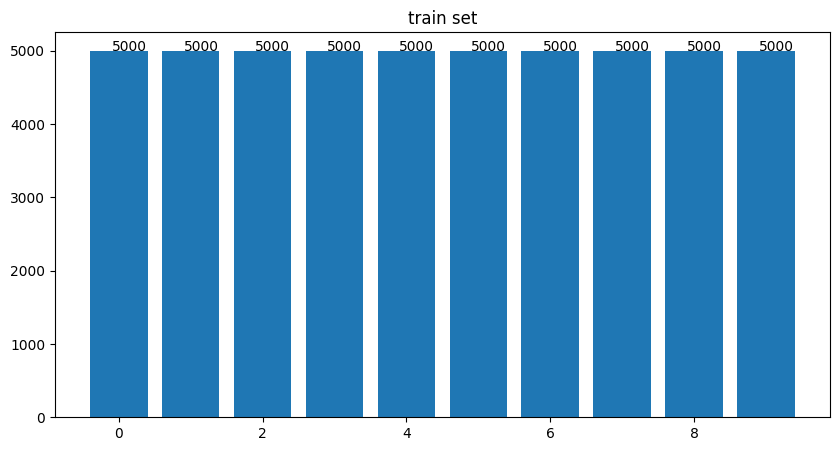

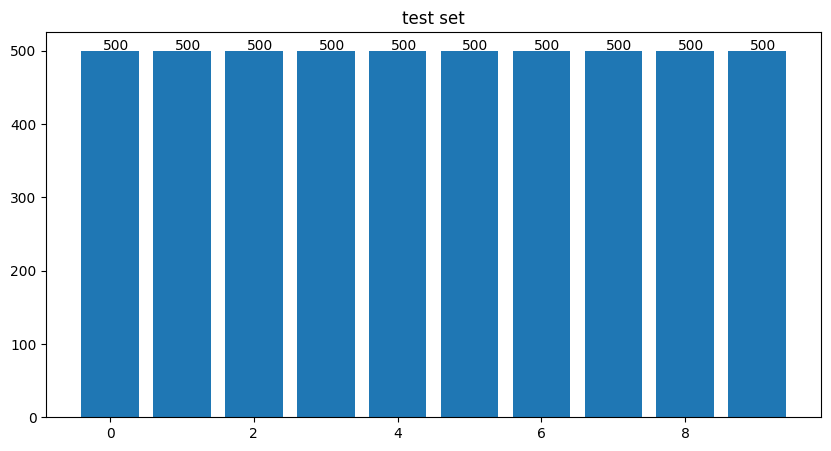

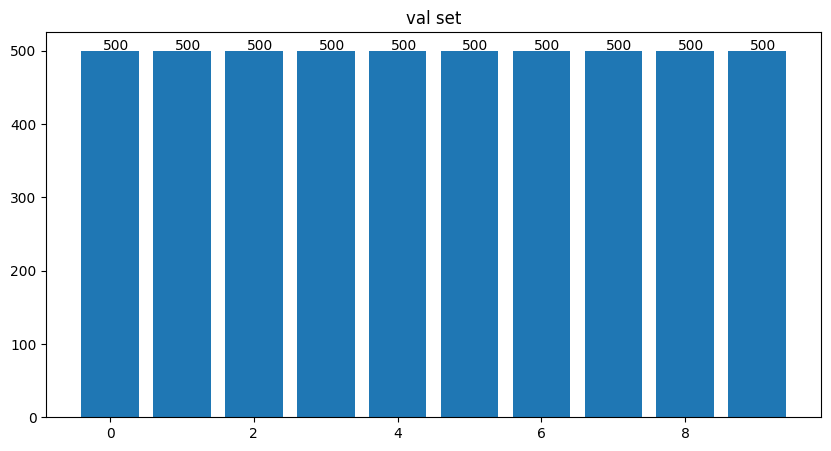

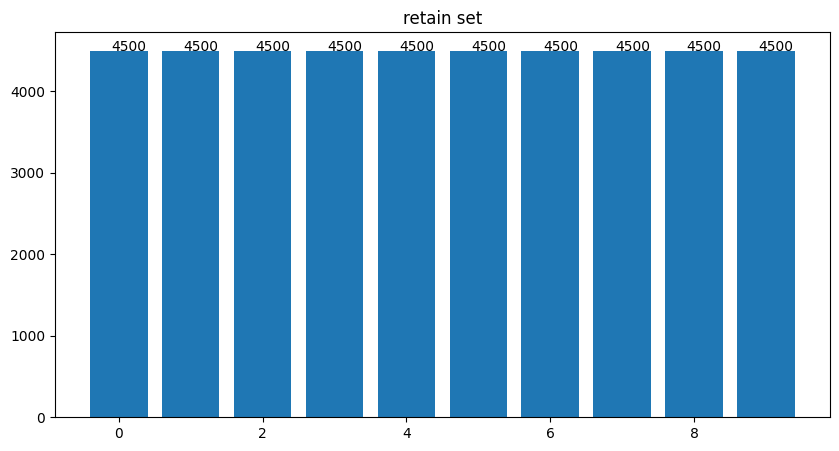

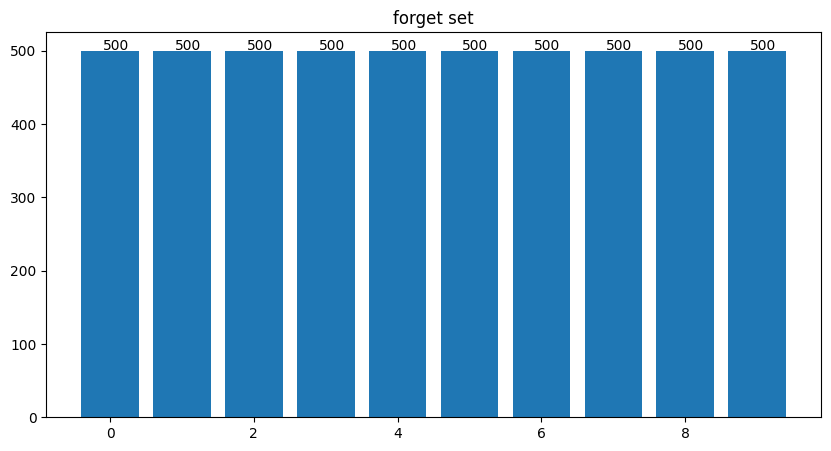

In [5]:
plot_samples_per_class(cifar10)

In [6]:
cat = UnlearningDataLoader('cifar-10', batch_size=128, frac_per_class_forget=0.1, image_size=32, seed=3407, is_class_unlearning=True, class_to_forget='cat')
dataloaders, dataset_sizes = cat.load_data()
print(dataset_sizes)

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'forget': 5000, 'retain': 45000, 'val': 5000, 'test': 5000}


In [13]:
horse = UnlearningDataLoader('cifar-10', batch_size=128, frac_per_class_forget=0.1, image_size=32, seed=3407, is_class_unlearning=True, class_to_forget='horse')
dataloaders, dataset_sizes = horse.load_data()
print(dataset_sizes)

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'forget': 5000, 'retain': 45000, 'val': 5000, 'test': 5000}


# CIFAR-100

In [14]:
cifar100 = UnlearningDataLoader("cifar-100", batch_size=128, frac_per_class_forget=0.1, image_size=32, seed=3407, is_class_unlearning=False)
dataloaders, dataset_sizes = cifar100.load_data()
print(dataset_sizes)

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'forget': 5000, 'retain': 45000, 'val': 5000, 'test': 5000}


In [15]:
rocket = UnlearningDataLoader("cifar-100", batch_size=128, frac_per_class_forget=0.1, image_size=128, seed=3407, is_class_unlearning=True, class_to_forget='rocket')
dataloaders, dataset_sizes = rocket.load_data()
print(dataset_sizes)

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'forget': 500, 'retain': 49500, 'val': 5000, 'test': 5000}


In [16]:
beaver = UnlearningDataLoader("cifar-100", batch_size=128, frac_per_class_forget=0.1, image_size=128, seed=3407, is_class_unlearning=True, class_to_forget='beaver')
dataloaders, dataset_sizes = beaver.load_data()
print(dataset_sizes)

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'forget': 500, 'retain': 49500, 'val': 5000, 'test': 5000}


In [8]:
print(cifar100.classes)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [9]:
for loader_name in ["train", "test", "val", "retain", "forget"]:
    print(loader_name)
    print(cifar100.get_samples_per_class(loader_name))
    print("\n")

train
{0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500, 41: 500, 42: 500, 43: 500, 44: 500, 45: 500, 46: 500, 47: 500, 48: 500, 49: 500, 50: 500, 51: 500, 52: 500, 53: 500, 54: 500, 55: 500, 56: 500, 57: 500, 58: 500, 59: 500, 60: 500, 61: 500, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 500, 68: 500, 69: 500, 70: 500, 71: 500, 72: 500, 73: 500, 74: 500, 75: 500, 76: 500, 77: 500, 78: 500, 79: 500, 80: 500, 81: 500, 82: 500, 83: 500, 84: 500, 85: 500, 86: 500, 87: 500, 88: 500, 89: 500, 90: 500, 91: 500, 92: 500, 93: 500, 94: 500, 95: 500, 96: 500, 97: 500, 98: 500, 99: 500}


test
{0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 50, 9: 50, 10: 50, 11: 50, 12: 50, 1